In [6]:
import numpy as np  # numpy 폴더의 __init__.py를 실행
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

baseFolder='c:/data/titanic'
titanic_df = pd.read_csv(baseFolder+'./train.csv')
titanic_df.head(3)
# csv를 numpy로 부를지 pandas로 부를지는 가지고 있는 데이터에 따라 결정

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
!pip show numpy

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: C:\Users\user\miniconda3\envs\py\Lib\site-packages
Requires: 
Required-by: contourpy, h5py, jax, matplotlib, mkl-fft, mkl-random, ml-dtypes, opt-einsum, pandas, scikit-learn, scipy, seaborn, tensorboard, tensorflow-intel


In [12]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# titanic_df의 데이터 수에 한해 랜덤으로 데이터 생성 (random 최대값은 891안에서만 나오게)
import random

lenMax=len(titanic_df.index)
lenMax

Num=7
#numList=[]
#for x in range(Num):
#    numList.append(random.randrange(0,lenMax))
numList=[random.randrange(0,lenMax) for x in range(Num)]

In [21]:
# random하게 데이터를 5개만 봄
#numList=[3,5,7]

titanic_df.iloc[numList,:]
# iloc : 전체 행, 열 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
310,311,1,1,"Hays, Miss. Margaret Bechstein",female,24.0,0,0,11767,83.1583,C54,C
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S


In [54]:
n='a'
# type(n)
# print(type(n))
if str(type(n)) != "<class 'int'>":
    print('wrong')
else:
    print(n)

wrong


In [60]:
# titanic_df의 데이터 수에 한해 랜덤으로 데이터 생성 (random 최대값은 891안에서만 나오게)
# 난수에 있어서 복원 추출(ex:randomforest), 비복원 추출을 생각해보아야 함

def myRandom(data,Num=5):
    if str(type(Num)) != "<class 'int'>":
        print('input wrong')
    else:
        import random
        lenMax=len(data)

        if Num>lenMax:
            print('data overflow :','you data max count ==>', lenMax)
        else:
            #list comprehension
            numList=[random.randrange(0,lenMax) for x in range(Num)]

            display(data.iloc[numList,:])

myRandom(titanic_df,'a')

input wrong


In [62]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())

# dtype 확인이 매우 중요


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [71]:
# 데이터 상관계수 제작
# Survived(생사여부) Pclass(선실등급)이 영향이 있는가
#tmp=titanic_df[['Survived','Pclass']]
tmp=titanic_df.iloc[:,[2,1,5,6]]
tmp.corr()

,Pclass,Survived,Age,SibSp
Pclass,1.000000,-0.338481,-0.369226,0.083081
Survived,-0.338481,1.000000,-0.077221,-0.035322
Age,-0.369226,-0.077221,1.000000,-0.308247
SibSp,0.083081,-0.035322,-0.308247,1.000000


In [83]:
# 위의 작업 자동화
# titanic_df의 자료형이 int32,int64,float32,float64인 필드만 추출
# 이후 상관계수 차트화

def myCorr(data):
    tmp=data.dtypes
    corrList=[]
    findtype=['int32','int64','float32','float64']
    for idx, val in zip(tmp.index, tmp.values):
        if val in findtype:
            corrList.append(idx)

    display(data[corrList].corr())  
    # 숫자가 들어간 필드만 찾도록 자동화하여 해당 필드들의 상관계수를 분석함
    return data[corrList].corr()
# Survived와 Pclass는 -의 상관도를 가짐
# 선실 등급이 1등급에서 3등급으로 갈 수록 Survived 수가 떨어짐
# 선실 등급이 1일 때 생존률이 높은 경향이 있음
# pclass&survived, sibsp(탑승한 형제자매 또는 배우자 인원수)&parch(같이 탑승한 부모님 또는 어린이 수)
# 상관관계가 인과관계를 의미하지는 않음 -> 따라서 연관성이 있다고 표현하면 안 됨

In [82]:
myCorr(titanic_df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [93]:
# numpy nan값 생성
# 이를 가지고 상관계수를 어떻게 구하는가? -> 검증의 문제

d1=[np.nan,2,2]
d2=[3,4,5]

np.nansum(d1), np.mean(d1), np.nanmean(d1)

# 위 예제에서 'Age'의 경우 nan값 존재
# nan값 처리를 어떻게 할 것인가?
# nansum -> nan값 제외하고 계산

a=pd.DataFrame({'name1':d1, 'name2':d2})
#a['name'].mean()
a.corr()
# nan의 경우 nan값이 있는 경우 결과가 nan으로 나옴

# titanic data의 경우 결측치가 nan으로 들어가있지 않음

,name1,name2
name1,NaN,NaN
name2,NaN,1.0


In [96]:
a=titanic_df[['Age', 'Fare']]
a.corr()
a[:30]

# titanic data의 경우 결측치가 nan으로 들어가있지 않음
# 값을 제외한건지 nan으로 처리한건지 등 확인해보는 방법

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
5,NaN,8.4583


In [98]:
a[:6].corr()

,Age,Fare
Age,1.000000,0.730448
Fare,0.730448,1.000000


In [97]:
a[:5].corr()

,Age,Fare
Age,1.000000,0.730448
Fare,0.730448,1.000000


In [ ]:
### 위에서 보았을 때 인덱스 5번째 값이 nan으로 나와있음
# 5번째까지와 4번째까지의 corr를 하였을 때 동일한 값이 나옴
# 값을 제외하고 진행한 것을 확인할 수 있음
# pandas nan data 찾기 or 제거

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


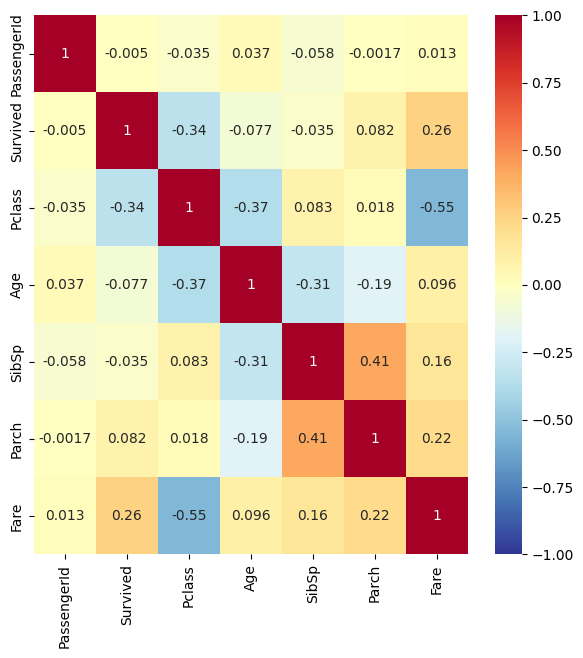

In [107]:
def myCorr(data):
    tmp=data.dtypes
    corrList=[]
    findtype=['int32','int64','float32','float64']
    for idx, val in zip(tmp.index, tmp.values):
        if val in findtype:
            corrList.append(idx)
    df=data[corrList].corr()
    df.to_csv('c:/data/titanic/result/corr.csv')  # 시간대별로 save하는 것이 좋음
    display(df)

    import seaborn as sns
    plt.figure(figsize=(7,7))
    sns.heatmap(df, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)
    plt.savefig('c:/data/titanic/result/corr_img')

myCorr(titanic_df)

#### 결측치 데이터처리
- 결측치 데이터는 머신러닝에서 계산이 불가하기 때문에 에러 발생
- 결측치가 있는 행 데이터 제거, 어떤 값으로 대체 (0, 임의 값을 지정, 예측값으로 채우거나, 평균이나 중앙값으로 채우거나)

<BarContainer object of 12 artists>

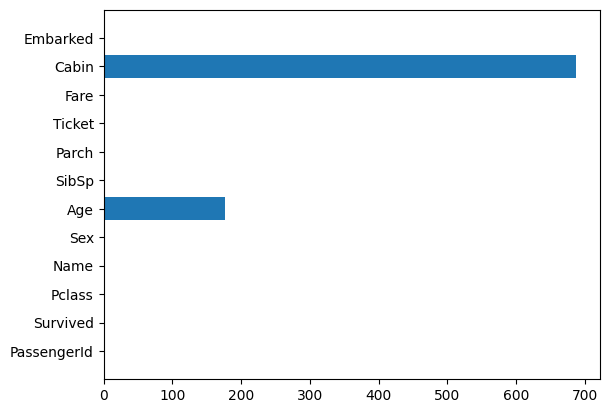

In [108]:
# 꼭 결측치 시각화 모듈을 제작하여 작업 하기
tmp=titanic_df.isna().sum()
plt.barh(tmp.index, tmp)

In [109]:
#titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)  # 평균으로 채움

titanic_df['Age'].fillna(0,inplace=True) # 0으로 채움
titanic_df['Cabin'].fillna('N',inplace=True) # N값으로 채움
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.038125,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500
Age,0.038125,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.057527,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000


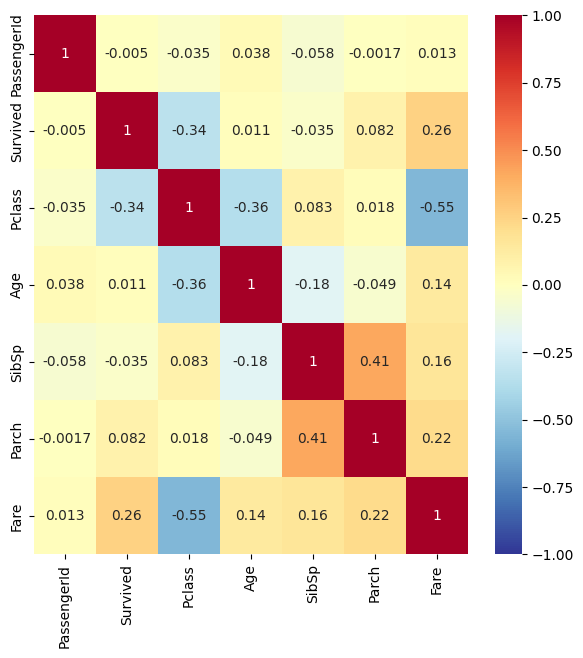

In [110]:
myCorr(titanic_df)
# age 값을 0으로 채웠을 때 결과 : 위의 값과 다르게 나옴을 확인 가능

In [114]:
type(titanic_df['Sex'].value_counts())
# dataframe은 필드 단위로 작업 가능
# series의 경우 인덱스와 값만 보여줌 - 이 경우는 series

pandas.core.series.Series

In [122]:
field='Sex'
titanic_df[field].value_counts()
# male, female : index  /  577, 314 : values
# %는 보고서에 무조건적으로 들어가야함

Sex
male      577
female    314
Name: count, dtype: int64

,name,val,ratio
0,male,577,64.76
1,female,314,35.24


([<matplotlib.patches.Wedge at 0x23592a2e610>,
 [Text(-0.4919454136803954, 0.9838646807152012, ''),
  Text(0.4919455057964525, -0.9838646346559433, '')])

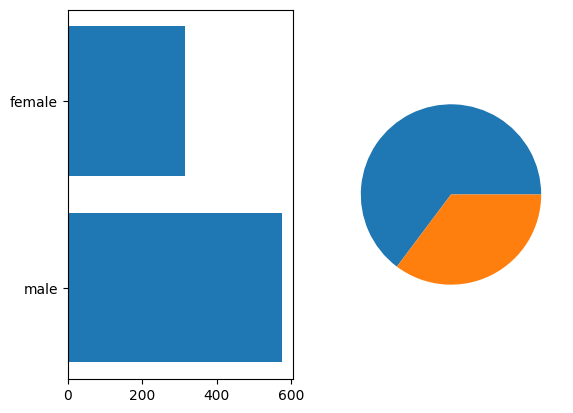

In [123]:
# 함수화 작업 필요

field='Sex'
tmp=titanic_df[field].value_counts()
#tmp.index, tmp.values
# series 좌측에 해당하는 index, 우측에 해당하는 값만 보임

ratio=[round((x/tmp.sum())*100,2) for x in tmp]

display(pd.DataFrame({'name':tmp.index, 'val':tmp.values, 'ratio':ratio}))
plt.subplot(1,2,1)
plt.barh(tmp.index, tmp.values)
plt.subplot(1,2,2)
plt.pie(tmp.values)
# 차트는 기호성에 맞춰서 작성
# 남자가 여자의 2배 정도의 탑승수를 보임

In [111]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())
# 보고서에 들어가는 내용
# 여자 남자의 비율 분포가 얼마나 달라졌는지 확인
# 133p ~ 138p 해석 확인
# 막대 차트는 %가 나오지 않음 원으로 그리는 것을 더선호하긴 함
# 일반적으로 막대 또는 원을 그릴 때 시각화의 중점은 잘 전달하는 것 (클라이언트에게)
# value_counts()의 경우 위에 제목(필드명)이 있는지 없는지 확인해야함

 Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [124]:
titanic_df.info()
# 나이대에 따른 분포도 중요함
# 나이는 명목형 변수로도 주로 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

# cabin의 경우 선실 등급을 나타내는 첫 번째 알파벳이 중요함
# 따라서 앞 문자만 추출하여 분석 진행
# why? 시대 상 부에 따라 차별이 있었기 때문에 일등실에 투숙한 사람이 삼등실 고객보다 생존 확률이 높음

0    N
1    C
2    N
Name: Cabin, dtype: object


,name,val,ratio
0,N,687,77.10
1,C,59,6.62
2,B,47,5.27
3,D,33,3.70
4,E,32,3.59
5,A,15,1.68
6,F,13,1.46
7,G,4,0.45
8,T,1,0.11


([<matplotlib.patches.Wedge at 0x23592f473d0>,
 [Text(-0.8275031118894706, 0.7247334681199997, ''),
  Text(0.3670961927005178, -1.036937985274329, ''),
  Text(0.7203468542172404, -0.8313244911701604, ''),
  Text(0.9232762920857227, -0.5979639524857995, ''),
  Text(1.034982006806026, -0.3725751542813491, ''),
  Text(1.0822631515781524, -0.19673960134178708, ''),
  Text(1.0963848700591308, -0.08910789362016726, ''),
  Text(1.099753855369629, -0.023269241492516957, ''),
  Text(1.0999931626376394, -0.003878421127741824, '')])

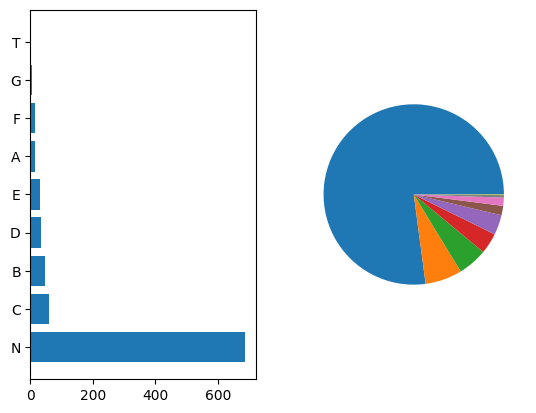

In [131]:
field='Cabin'
tmp=titanic_df[field].str[:1].value_counts()
ratio=[round((x/tmp.sum())*100,2) for x in tmp]

display(pd.DataFrame({'name':tmp.index, 'val':tmp.values, 'ratio':ratio}))
plt.subplot(1,2,1)
plt.barh(tmp.index, tmp.values)
plt.subplot(1,2,2)
plt.pie(tmp.values)


In [128]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

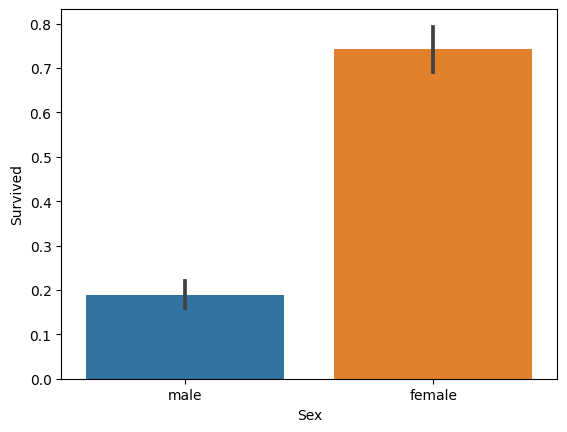

In [129]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)
# 성별에 따른 생존여부 카운트 수
# 생존 1, 사망 0
# 남자가 여자에 비해 사망도가 훨씬 높음
# 데이터에 따라 비교해야하는 값이 달라짐

<Axes: xlabel='Pclass', ylabel='Survived'>

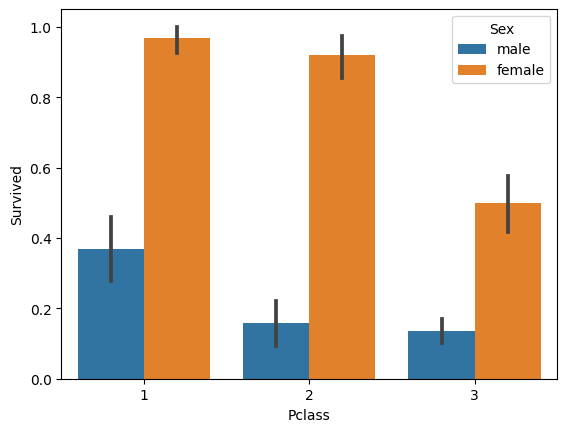

In [130]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
# 남자의 경우 1등실이2,3등실에 비해 생졸률이 높음
# 주의) 여자와 남자의 비율 자체에 차이가 있기 때문에 1,2,3등실의 인원 수도 확인해보아야 함!!!
# 따로 찾아보기

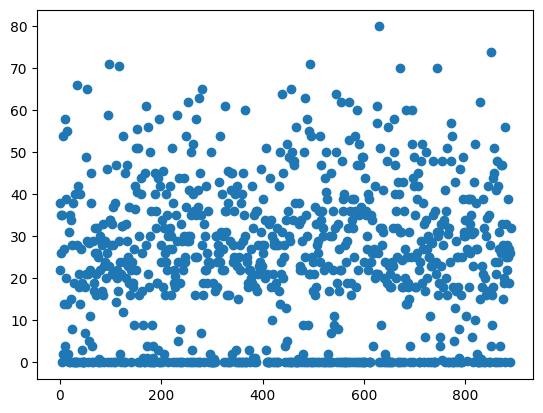

In [133]:
### 산점도 차트 : 숫자형은 다 제작해야함! 
# 데이터의 분포도가 얼마에서 얼마인지 확인
tmp=titanic_df.dtypes
valList=[]
findtype=['int32','int64','float32','float64']
for idx, val in zip(tmp.index, tmp.values):
    if val in findtype:
        valList.append(idx)    
valList

# 옵션 1 : 가로로 그래프들 보이기
# 옵션 2 : 세로로 그래프들 보이기
# -> 함수로 구현
#for cnt, val in enumerate(valList)
#plt.plot(titanic_df['Age'])
plt.scatter(titanic_df.index, titanic_df['Age'])

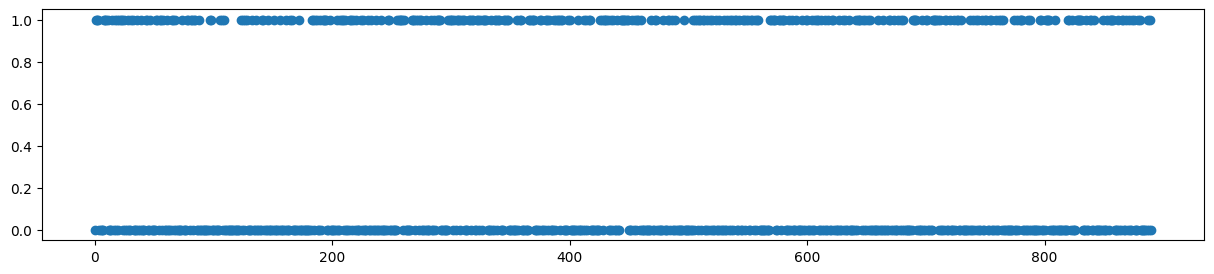

In [135]:
plt.figure(figsize=(15,3))
plt.scatter(titanic_df.index, titanic_df['Survived'])
# 번호가 갖는 특성이 있는 경우 사용할 만함

In [ ]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [142]:
## 선실 등급별에 따른 남녀 구분

titanic_df[(titanic_df['Pclass']==1) & (titanic_df['Sex']=='male')]  # 1등실에 해당하며 성별이 남자인 데이터만 꺼내기

# 이 중 젊은 사람만
tmp1=titanic_df[(titanic_df['Pclass']==1) & (titanic_df['Sex']=='male') & (titanic_df['Age']>=15) & (titanic_df['Age']<40)]
tmp2=titanic_df[(titanic_df['Pclass']==2) & (titanic_df['Sex']=='male') & (titanic_df['Age']>=15) & (titanic_df['Age']<40)]
tmp3=titanic_df[(titanic_df['Pclass']==3) & (titanic_df['Sex']=='male') & (titanic_df['Age']>=15) & (titanic_df['Age']<40)]

<Axes: xlabel='Sex', ylabel='Survived'>

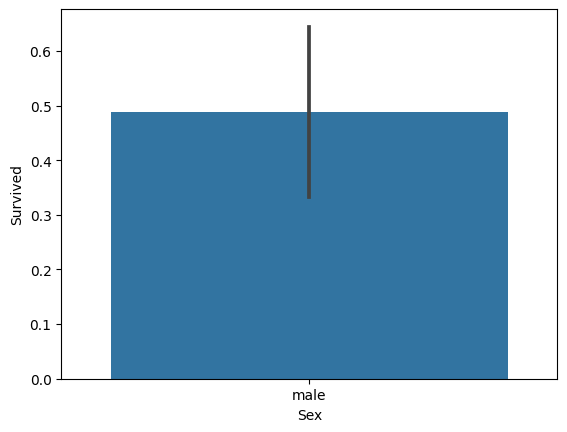

In [143]:
sns.barplot(x='Sex', y='Survived', data=tmp1)

In [148]:
#tmp1.info()
tmp1['Survived'].value_counts(), tmp2['Survived'].value_counts()
# 젊은 남자 대상으로 비교했을 때 생존률의 차이가 큼
# 재난재해가 생겼을 때 남자이면서 나이가 젊은 사람은 구조 우선 대상이 아니므로 생존률에 영향이 생김

(Survived
 0    23
 1    22
 Name: count, dtype: int64,
 Survived
 0    65
 1     4
 Name: count, dtype: int64)

In [160]:
AgeStart,AgeEnd=15,40
find='female'
tmp1=titanic_df[(titanic_df['Pclass']==1) & (titanic_df['Sex']==find) & (titanic_df['Age']>=AgeStart) & (titanic_df['Age']<AgeEnd)]
tmp2=titanic_df[(titanic_df['Pclass']==2) & (titanic_df['Sex']==find) & (titanic_df['Age']>=AgeStart) & (titanic_df['Age']<AgeEnd)]
tmp3=titanic_df[(titanic_df['Pclass']==3) & (titanic_df['Sex']==find) & (titanic_df['Age']>=AgeStart) & (titanic_df['Age']<AgeEnd)]

In [161]:
pd.DataFrame({'all':titanic_df['Survived'].value_counts(),
              'pclass_1': tmp1['Survived'].value_counts(),
              'pclass_2': tmp2['Survived'].value_counts(),
              'pclass_3': tmp3['Survived'].value_counts()})

,all,pclass_1,pclass_2,pclass_3
Survived,,,,
0,549,1,4,32
1,342,54,44,33


In [150]:
result=[]
result.append(titanic_df['Survived'].value_counts())
result.append(tmp1['Survived'].value_counts())
result.append(tmp2['Survived'].value_counts())
result.append(tmp3['Survived'].value_counts())

result

[Survived
 0    549
 1    342
 Name: count, dtype: int64,
 Survived
 0    23
 1    22
 Name: count, dtype: int64,
 Survived
 0    65
 1     4
 Name: count, dtype: int64,
 Survived
 0    164
 1     27
 Name: count, dtype: int64]

### 처음부터 다시 시작
< 필수 작업 >
- 머신러닝에 참여할 문자데이터를 숫자로
- 결측치 처리

In [162]:
from sklearn import preprocessing
# 데이터 머신러닝 작업

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']  # 문자지만 계산에 참여 -> 전처리(eda)에서 봤을 때 연관성이 있는 것처럼 보였으므로
    for feature in features:
        le = preprocessing.LabelEncoder()  # 레벨인코더
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

# Cabin, Sex 등이 숫자로 표현됨

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [163]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df): # 결측치 값들을 바꿔줌, 정해진 것은 없음, 완전 자동화는 아님(결측치로 추정되는 것들은 직접 넣어주므로)
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [165]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('c:/data/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)
# 결측치 처리와 데이터 전처리로 준비 완료

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)
# test에는 생존여부의 0과 1이 모두 들어간지 모름
# 20% 비율로 나눔 약 180개 정도가 테스트로 들어감

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# y에 해당하는 predict 결과가 어떻게 나오는지
# 생존여부 y값이 0,1로 나오므로 예측값도 그렇게 나옴
# 따라서 정확도는 예측값을 y와 맞는지만 확인하기 때문에 구하기 쉬움

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [168]:
from sklearn.model_selection import KFold

# 정확도를 적어도 88% 이상으로 끌어올리고 싶은 경우

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 옵션이 여러 개인 것을 for로 넣자 : gridsearch
# 최종적으로 gridsearch만 사용해도 됨

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

# dt_clf : 결정 트리 모델로 사용 -> 이전 정확도가 78% 나온 것을 높이고 싶어서 사용함
grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
# scoring : 언제 가장 좋은 값을 가져올 지? accuray가 가장 높을 때
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_
# 가장 좋은 추정기 성능

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
# test에서 78%였던 decision tree가 87%로 성능이 오름

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


### 이항 분류 설명력 !!! (매우 중요)
##### 145p ~ 151p 오차행렬 그림 참고
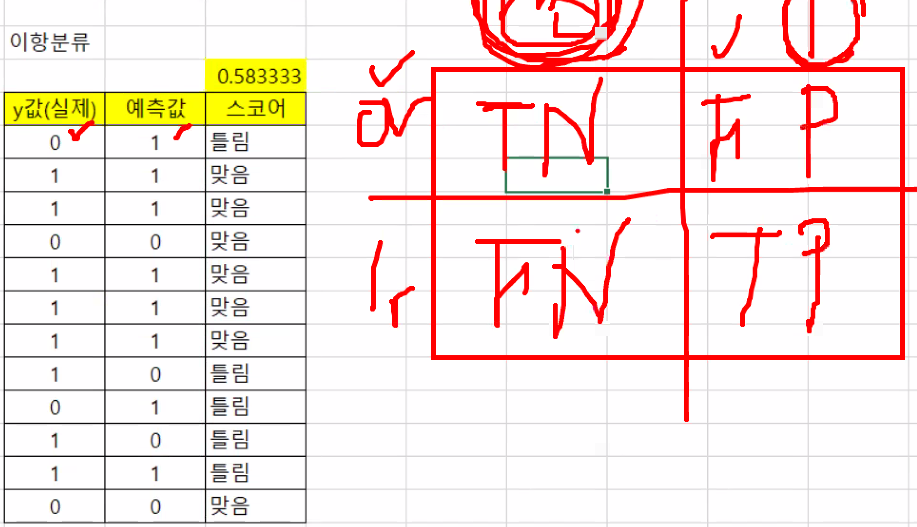

In [ ]:
# 이항분류는 결과가 둘 중 하나
# 스코어 값은 틀리고 맞음이 몇개인지 센 후 비율을 나타내는 것
# 0인데 1, 1인데 0 등으로 어떻게 맞췄는지가 중요
# 맞추거나 틀린 것이 무슨 값을 맞추거나 틀린 것인지
# 151p 그림 참고
# 예측값으로 결정 : negative, positive
# y(실제 값)로 결정 : true, false